<a href="https://colab.research.google.com/github/OELSHARK/Linear-Multiple-and-Polynomial./blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('Student_Performance.csv')

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.isnull().sum()


,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
df.duplicated().sum()

127

In [ ]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Extracurricular Activities'] = label_encoder.fit_transform(df['Extracurricular Activities'])


In [ ]:
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 4.305900938538479
Mean Absolute Error: 1.6469703984255573


In [ ]:
lr.score(X_test, y_test)

0.9884301209927054

In [ ]:
lr.coef_

array([2.8510219 , 1.01843034, 0.57382297, 0.47207329, 0.18870366])

In [ ]:
lr.intercept_

-33.981324496440635

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
a = lr.coef_
c = lr.intercept_
print(a)
print(c)

[ 0.00000000e+00  2.73501335e+00  1.02734053e+00  2.43544745e-01
  2.69983929e-01  1.78292058e-01  3.30197797e-03  7.55008886e-06
  1.39866521e-02  9.78524582e-03  2.47876121e-03 -7.49437768e-05
  2.36688148e-03  3.36028462e-04 -4.08373441e-04  2.43544745e-01
 -1.09767005e-02 -1.59282374e-02  8.68730607e-03  4.93716545e-03
  2.26789195e-04]
-33.326735427555334


In [ ]:
y_pred = lr.predict(X_test_poly)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 4.305196231740661
Mean Absolute Error: 1.6467860751154715


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv('WHO COVID-19 cases.csv')

In [ ]:
df.head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0


In [ ]:
df.isnull().sum()

,0
Date_reported,0
Country_code,244
Country,0
Continent,0
WHO_region,4392
New_cases,19300
Cumulative_cases,0
New_deaths,33476
Cumulative_deaths,0


In [ ]:
dtypes = df.dtypes
nunique = df.nunique()
null = df.isnull().sum()
df_info = pd.DataFrame({'dtypes': dtypes, 'nunique': nunique, 'null': null})
df_info

,dtypes,nunique,null
Date_reported,object,244,0
Country_code,object,239,244
Country,object,240,0
Continent,object,8,0
WHO_region,object,7,4392
New_cases,float64,11970,19300
Cumulative_cases,int64,34234,0
New_deaths,float64,2138,33476
Cumulative_deaths,int64,14289,0


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
# df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [ ]:
df[categorical_columns] = df[categorical_columns].astype('category')


In [ ]:
print(df.dtypes)

Date_reported        category
Country_code         category
Country              category
Continent            category
WHO_region           category
New_cases             float64
Cumulative_cases        int64
New_deaths            float64
Cumulative_deaths       int64
dtype: object


In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
# df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [ ]:
numeric_columns

Index(['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'], dtype='object')

KeyboardInterrupt: 

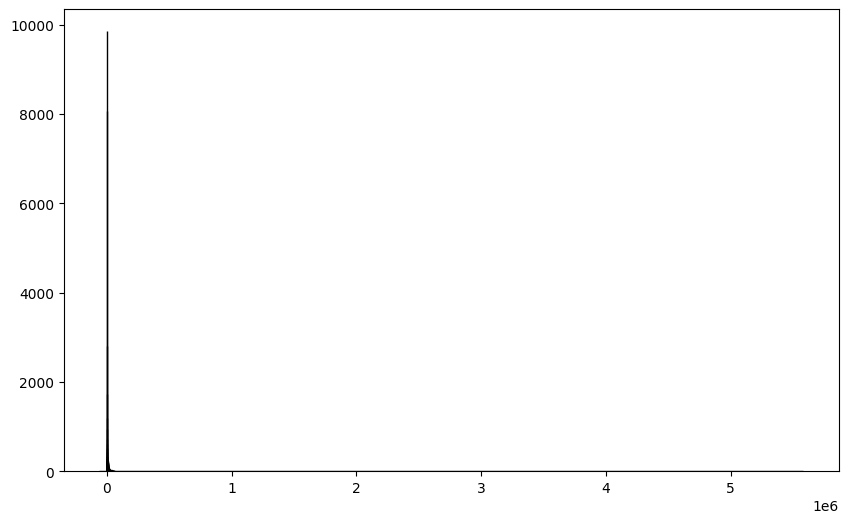

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()